In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('C:\\Users\\amuza\\Desktop\\PJWSTK\\metody\\Speed_Dating_Data.csv', engine='python')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [2]:
#data.describe(include='all')


# Preparing our dataset

In [2]:
waves_nums = [1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
subsets = {}
data_subset = data.loc[:, ['iid','wave','gender','age','race','field_cd', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1','shar1_1']].copy()
data_subset = data_subset[data_subset.wave.isin(waves_nums)].copy()
data_subset.drop_duplicates(inplace=True)
data_subset
#GENDER SUBSETS
subsets['all_data_1']=data_subset
subsets['all_data_man_1']=data_subset[data_subset.gender==1].copy()
subsets['all_data_woman_1']=data_subset[data_subset.gender==0].copy()

#AGE SUBSETS
subsets['all_data_young_1']=data_subset[data_subset.age<25].copy()
subsets['all_data_mid_1']=data_subset[(data_subset.age>=25) & (data_subset.age<=33)].copy()
#subsets['all_data_old_1']=data_subset[data_subset.age>33].copy()


#RACE SUBSETS
#subsets['all_data_black_1']=data_subset[data_subset.race==1].copy()
#subsets['all_data_caucasian_1']=data_subset[data_subset.race==2].copy()
#subsets['all_data_hispanic_1']=data_subset[data_subset.race==3].copy()
#subsets['all_data_asian_1']=data_subset[data_subset.race==4].copy()
#subsets['all_data_other_1']=data_subset[data_subset.race==6].copy()

#indexes for professions 

math_index = [2, 4, 5, 8, 10]
human_index = [1, 3, 7, 9, 13, 16]
artist_index = [6, 14, 15, 17,]
#PROFESSION SUBSETS
#subsets['science']=data_subset[data_subset.field_cd.isin(math_index)].copy()
#subsets['humanisties']=data_subset[data_subset.field_cd.isin(human_index)].copy()
#subsets['artist']=data_subset[data_subset.field_cd.isin(artist_index)].copy()



#CLEAN UP REDUNDANT DATA IN ALL SETS
for subsetKey in subsets:
        del subsets[subsetKey]['gender']
        del subsets[subsetKey]['wave']
        del subsets[subsetKey]['iid']
        del subsets[subsetKey]['race']
        del subsets[subsetKey]['field_cd']
        del subsets[subsetKey]['age']
        subsets[subsetKey].dropna(inplace=True)
        #print(subsetKey)
        #print(subsets[subsetKey])
        #print(subsets[subsetKey].shape)






In [27]:
waves_nums = [1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
#SUBSET2 is used for calc. mean user of each cluster
subsets2 = {}
data_subset2 = data.loc[:, ['iid','wave','gender','age','race', 'date', 'go_out','sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga', 'field_cd','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].copy()
data_subset2 = data_subset2[data_subset2.wave.isin(waves_nums)].copy()
data_subset2.drop_duplicates(inplace=True)

#GENDER SUBSETS
subsets2['all_data_1']=data_subset2
subsets2['all_data_man_1']=data_subset2[data_subset2.gender==1].copy()
subsets2['all_data_woman_1']=data_subset2[data_subset2.gender==0].copy()

#AGE SUBSETS
subsets2['all_data_young_1']=data_subset2[data_subset2.age<25].copy()
subsets2['all_data_mid_1']=data_subset2[(data_subset2.age>=25) & (data_subset2.age<=33)].copy()
#subsets2['all_data_old_1']=data_subset2[data_subset2.age>33].copy()


#RACE SUBSETS
#subsets2['all_data_black_1']=data_subset2[data_subset2.race==1].copy()
#subsets2['all_data_caucasian_1']=data_subset2[data_subset2.race==2].copy()
#subsets2['all_data_hispanic_1']=data_subset2[data_subset2.race==3].copy()
#subsets2['all_data_asian_1']=data_subset2[data_subset2.race==4].copy()
#subsets2['all_data_other_1']=data_subset2[data_subset2.race==6].copy()

#indexes for professions 
#indexes for professions 

math_index = [2, 4, 5, 8, 10]
human_index = [1, 3, 7, 9, 13, 16]
artist_index = [6, 14, 15, 17,]
#PROFESSION SUBSETS
#subsets2['science']=data_subset2[data_subset2.field_cd.isin(math_index)].copy()
#subsets2['humanisties']=data_subset2[data_subset2.field_cd.isin(human_index)].copy()
#subsets2['artist']=data_subset2[data_subset2.field_cd.isin(artist_index)].copy()

for subsetKey in subsets2:
    subsets2[subsetKey].dropna(subset = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'],inplace=True)
    
subsets2['all_data_woman_1'].shape
#subsets['all_data_young_1']

(218, 31)

In [5]:
#data_subset.agg({'age_o' : ['count', 'min','max']})
#age_groups=data_subset.groupby('age_o').groups
#for ageGroup in age_groups:
    #print(ageGroup,len(age_groups[ageGroup].tolist()))

#race_groups=data_subset.groupby('race_o').groups
#for race_group in race_groups:
    #print(race_group,len(race_groups[race_group].tolist()))

# K-means

In [6]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.manifold import TSNE

In [8]:
scaler = StandardScaler()
standard_scaled_transforms={}
for subsetKey in subsets:
        standard_scaled_transforms[subsetKey]=scaler.fit_transform(subsets[subsetKey])
        print(subsetKey)
#standard_scaled_transforms

all_data_1
all_data_man_1
all_data_woman_1
all_data_young_1
all_data_mid_1


In [28]:
#Run clustering on a scaled model
labels = {}
kmeans = KMeans(n_clusters=5, max_iter=300, n_init=10, random_state=0)
#kmeans = SpectralClustering(n_clusters=5,random_state=0, affinity = 'nearest_neighbors')
for subsetKey in standard_scaled_transforms:
        labels_ = kmeans.fit_predict(standard_scaled_transforms[subsetKey])
        subsets[subsetKey]['Cluster'] = labels_
        labels[subsetKey] = labels_
        if subsetKey in subsets2.keys():
            subsets2[subsetKey]['Cluster'] = labels_
        #print(subsets[subsetKey])
        

In [29]:
subsets2[subsetKey]['Cluster']

20      4
70      1
80      0
90      0
100     0
150     2
160     4
170     3
180     2
216     3
248     1
264     1
376     4
392     4
424     0
440     1
456     1
504     0
523     0
599     3
618     4
637     0
675     3
694     1
751     2
770     0
848     1
858     1
868     0
888     3
       ..
7311    1
7340    1
7347    3
7354    4
7361    3
7368    0
7374    4
7386    1
7410    3
7432    4
7564    2
7586    3
7630    4
7652    1
7674    1
7718    3
7740    1
7784    1
7894    1
7916    0
7938    4
8004    0
8048    2
8224    0
8246    3
8268    2
8290    3
8312    0
8334    0
8356    2
Name: Cluster, Length: 265, dtype: int32

In [30]:
num_of_clusters = 5
for subsetKey in subsets:
    for i in range(0,num_of_clusters):
        cluster_rows = subsets[subsetKey][subsets[subsetKey].Cluster == i]
        print(str(subsetKey) + " Cluster:"+ str(i) + " " + str(cluster_rows.shape))
        

all_data_1 Cluster:0 (83, 7)
all_data_1 Cluster:1 (82, 7)
all_data_1 Cluster:2 (36, 7)
all_data_1 Cluster:3 (172, 7)
all_data_1 Cluster:4 (67, 7)
all_data_man_1 Cluster:0 (42, 7)
all_data_man_1 Cluster:1 (66, 7)
all_data_man_1 Cluster:2 (79, 7)
all_data_man_1 Cluster:3 (14, 7)
all_data_man_1 Cluster:4 (21, 7)
all_data_woman_1 Cluster:0 (88, 7)
all_data_woman_1 Cluster:1 (53, 7)
all_data_woman_1 Cluster:2 (47, 7)
all_data_woman_1 Cluster:3 (19, 7)
all_data_woman_1 Cluster:4 (11, 7)
all_data_young_1 Cluster:0 (38, 7)
all_data_young_1 Cluster:1 (42, 7)
all_data_young_1 Cluster:2 (15, 7)
all_data_young_1 Cluster:3 (30, 7)
all_data_young_1 Cluster:4 (30, 7)
all_data_mid_1 Cluster:0 (49, 7)
all_data_mid_1 Cluster:1 (94, 7)
all_data_mid_1 Cluster:2 (27, 7)
all_data_mid_1 Cluster:3 (55, 7)
all_data_mid_1 Cluster:4 (40, 7)


In [12]:
subsets2

{'all_data_1':       iid  wave  gender   age  race  date  go_out  sports  tvsports  exercise  \
 0       1     1       0  21.0   4.0   7.0     1.0     9.0       2.0       8.0   
 10      2     1       0  24.0   2.0   5.0     1.0     3.0       2.0       7.0   
 20      3     1       0  25.0   2.0   3.0     1.0     3.0       8.0       7.0   
 30      4     1       0  23.0   2.0   5.0     1.0     1.0       1.0       6.0   
 40      5     1       0  21.0   2.0   4.0     1.0     7.0       4.0       7.0   
 50      6     1       0  23.0   4.0   3.0     1.0    10.0       8.0       9.0   
 60      7     1       0  22.0   4.0   5.0     1.0     5.0       3.0       4.0   
 70      8     1       0  25.0   2.0   5.0     1.0     2.0       2.0       1.0   
 80      9     1       0  26.0   6.0   4.0     1.0     4.0       3.0       1.0   
 90     10     1       0  26.0   2.0   6.0     1.0     9.0       9.0       9.0   
 100    11     1       1  27.0   2.0   5.0     4.0     8.0       7.0       2.0   
 1

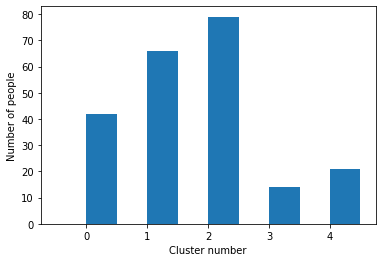

In [14]:
#w pętli #zostanwdomu
    
ax1 = plt.axes()

ax1.set_xlabel('Cluster number')
ax1.set_ylabel('Number of people')
ax1.set_xticks([0,1,2,3,4])
#histogram = subsets['all_data_1'].hist(column = 'Cluster', grid= False, ax = ax1, xlabelsize = 15, align = 'mid')
histogram = plt.hist(subsets['all_data_man_1']['Cluster'],align = 'mid', range = (-0.5, 4.5))
    #plt.clf()
    #plt.close()



<BarContainer object of 6 artists>

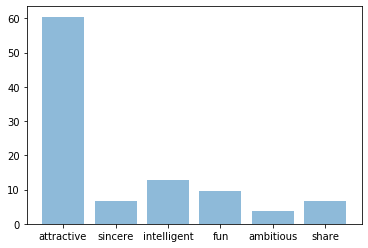

In [41]:
clusters_means = {}
clusters_pearson = {}
subsets3 = {}
for subsetKey in subsets2:
    for i in range(0,5):
        clusters_means[subsetKey +'_cl' + str(i)] = subsets2[subsetKey][subsets2[subsetKey].Cluster == i].mean()
        #clusters_pearson[subsetKey +'_cl' + str(i)] = subsets2[subsetKey][subsets2[subsetKey].Cluster == i].loc[:,['date', 'go_out','sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga', 'field_cd','attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].corr(method='spearman')
     
mean_values = [clusters_means['all_data_man_1_cl4']['attr1_1'], clusters_means['all_data_man_1_cl4']['sinc1_1'], clusters_means['all_data_man_1_cl4']['intel1_1'], clusters_means['all_data_man_1_cl4']['fun1_1'], clusters_means['all_data_man_1_cl4']['amb1_1'], clusters_means['all_data_man_1_cl4']['shar1_1']]
titles = ['attractive', 'sincere', 'intelligent', 'fun','ambitious', 'share' ]
plt.bar(titles, mean_values, align='center', alpha=0.5)

In [35]:
clusters_means

{'all_data_1_cl0': iid         325.433735
 wave         12.903614
 gender        0.457831
 age          26.719512
 race          3.108434
 date          5.084337
 go_out        2.409639
 sports        6.228916
 tvsports      4.686747
 exercise      5.722892
 dining        7.650602
 museums       6.843373
 art           6.530120
 hiking        5.686747
 gaming        3.301205
 clubbing      5.253012
 reading       7.674699
 tv            5.602410
 theater       6.662651
 movies        8.036145
 concerts      6.867470
 music         7.987952
 shopping      5.048193
 yoga          4.686747
 field_cd      7.626506
 attr1_1      18.142651
 sinc1_1      24.333012
 intel1_1     17.649398
 fun1_1       15.231325
 amb1_1        6.784217
 shar1_1      17.738675
 Cluster       0.000000
 dtype: float64, 'all_data_1_cl1': iid         295.512195
 wave         11.560976
 gender        0.707317
 age          26.219512
 race          2.573171
 date          4.728395
 go_out        1.926829
 sports     

In [12]:
#wyodrebnic atrakcyjnosc do zmiennej
plotting_data = [[],[],[],[],[]]
for i in range(0,5):
    plotting_data[0].append(clusters_mean['all_data_man_1'+'_cl' + str(i)]['attr1_1'])
    plotting_data[1].append(clusters_mean['all_data_man_1'+'_cl' + str(i)]['sports'])
    plotting_data[2].append(clusters_mean['all_data_man_1'+'_cl' + str(i)]['exercise'])
    plotting_data[3].append(clusters_mean['all_data_man_1'+'_cl' + str(i)]['reading'])
    plotting_data[4].append(clusters_mean['all_data_man_1'+'_cl' + str(i)]['clubbing'])
    #plotting_data[1].append(clusters_pearson['all_data_man_1'+'_cl' + str(i)]['intel1_1']['exercise'] + clusters_pearson['all_data_man_1'+'_cl' + str(i)]['intel1_1']['sports'])
plotting_data    
plt.scatter(plotting_data[1], plotting_data[0], s=150)
plt.scatter(plotting_data[2], plotting_data[0], s=100)
#plt.scatter(plotting_data[3], plotting_data[0], s=150)
#plt.scatter(plotting_data[4], plotting_data[0], s=150)

plt.show()

NameError: name 'clusters_mean' is not defined

In [16]:
#Elbow plot
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(standard_scaled_transforms['all_data_man_1'])
    sse.append(km.inertia_)
    
sse

[1332.0000000000002,
 1047.7364214835598,
 903.0805033821648,
 802.1320535468295,
 722.054676624756,
 661.3732673932492,
 612.1908025337613,
 553.6384516861855,
 522.1501555933236,
 490.00438811175167]

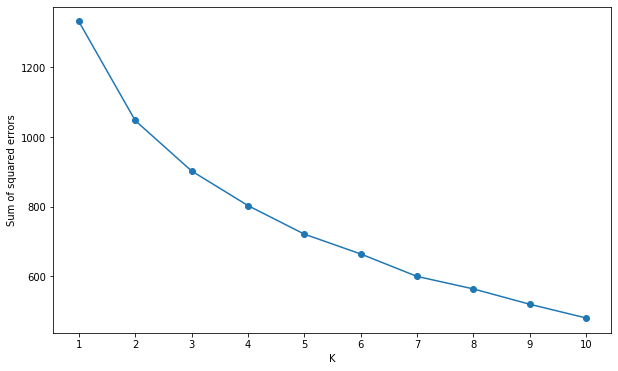

In [14]:
plt.figure(figsize=(10,6))
plt.xticks(range(11))
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_range,sse,marker='o')

# Principal Component Analysis

In [17]:
import plotly.express as px

In [18]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=2)
#pca = TSNE(n_components=2)
#data_subset_pca = pca.fit_transform(standard_scaled_transforms['all_data_man_1'])
data_subset_pca = pca.fit_transform(standard_scaled_transforms['all_data_man_1'])
data_subset_pca

array([[ 8.76433440e-01,  1.21975648e-01],
       [ 4.55093751e+00,  2.37500017e+00],
       [-9.99832990e-01,  2.50741583e-01],
       [ 1.59348163e+00,  3.04444464e+00],
       [-4.80072924e-01, -1.02098890e+00],
       [ 1.50131900e+00, -6.89271006e-01],
       [ 9.24883132e-02, -8.81562379e-01],
       [-7.47149982e-02, -1.25073755e+00],
       [ 1.50991561e+00, -9.92484192e-01],
       [ 5.70654832e+00, -3.12960200e+00],
       [-2.29520219e-01,  8.20717069e-01],
       [ 1.08781733e+00,  9.86087153e-01],
       [-1.01017967e+00, -3.25368602e-01],
       [-6.86792589e-01, -9.23365495e-01],
       [-9.96810606e-01,  1.07110954e+00],
       [-4.69471253e-01, -5.80025891e-01],
       [-1.28386305e+00, -1.03987630e+00],
       [-3.08386415e-01,  1.21664089e+00],
       [ 6.25321001e-01,  1.37143810e+00],
       [-6.38431824e-01,  1.30965099e-01],
       [ 3.41662465e-01, -1.44138964e-01],
       [-5.19143797e-01, -7.57697326e-03],
       [-4.35644545e-01,  1.29828979e+00],
       [ 5.

In [19]:
data_subset_tf = pd.concat([pd.DataFrame(data_subset_pca, columns=['PC1', 'PC2']),
                            pd.DataFrame(labels['all_data_man_1'], columns=['Cluster'])],
                           axis=1)
data_subset_tf.dropna(inplace=True)

In [20]:
pca.components_

array([[ 0.65236507, -0.34888977, -0.39206788,  0.12663556, -0.3946137 ,
        -0.35668192],
       [-0.29121261, -0.26002663,  0.15897392,  0.85456368,  0.11754503,
        -0.27966541]])

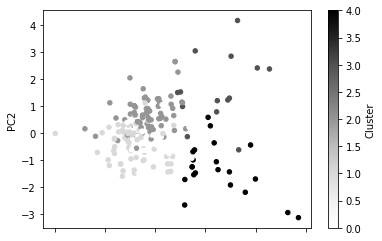

In [140]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c='Cluster')

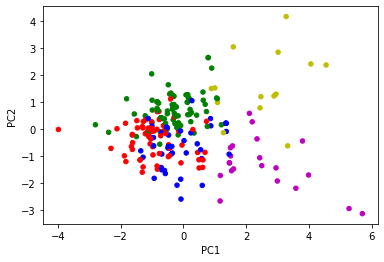

In [21]:
data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.Cluster.replace([0.0, 1.0, 2.0, 3.0, 4.0], ['b', 'r', 'g', 'y', 'm']))

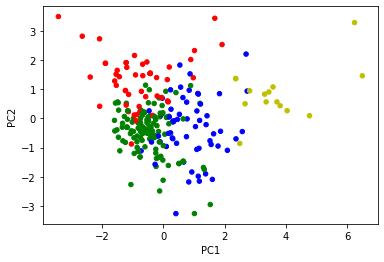

In [99]:
#Saving image
plot = data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.Cluster.replace([0, 1, 2, 3, 4], ['b', 'r', 'g', 'y', 'm']))
fig = plot.get_figure()
fig.savefig("all_data_woman.png", dpi=600)

In [126]:
pca.embedding_

array([[ -8.806055  ,   2.7872224 ],
       [ 13.658237  ,   2.5969963 ],
       [ -0.27255937,   8.683654  ],
       [ 11.862783  ,   3.4426208 ],
       [  7.578319  ,  -7.9416676 ],
       [  9.459993  ,  -3.1194386 ],
       [  7.1059637 ,  -5.738346  ],
       [  9.919371  ,  -8.718606  ],
       [  9.404871  ,  -3.4961243 ],
       [ 15.679759  ,  -5.389696  ],
       [ -9.321491  ,  -1.2398552 ],
       [  2.6522546 ,  -2.2718625 ],
       [ -4.601507  ,  -3.547783  ],
       [ -9.524343  ,  -7.5946465 ],
       [  1.4145764 ,   6.105995  ],
       [  2.5769005 ,  -4.884169  ],
       [-10.423942  ,  -5.1977944 ],
       [ -5.891585  ,   0.8976049 ],
       [ -6.798653  ,   2.307491  ],
       [ -1.2002021 ,  -1.9024032 ],
       [  6.608403  ,  -4.153882  ],
       [  4.0170293 ,  -5.9253783 ],
       [  1.6170619 ,  -1.9440079 ],
       [  8.106429  ,  -5.8119826 ],
       [ -9.557833  ,   2.2206964 ],
       [ -5.363134  ,  -4.775698  ],
       [  0.31227377,  12.528755  ],
 

In [22]:
data_subset.columns[:-1]

Index(['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1'], dtype='object')

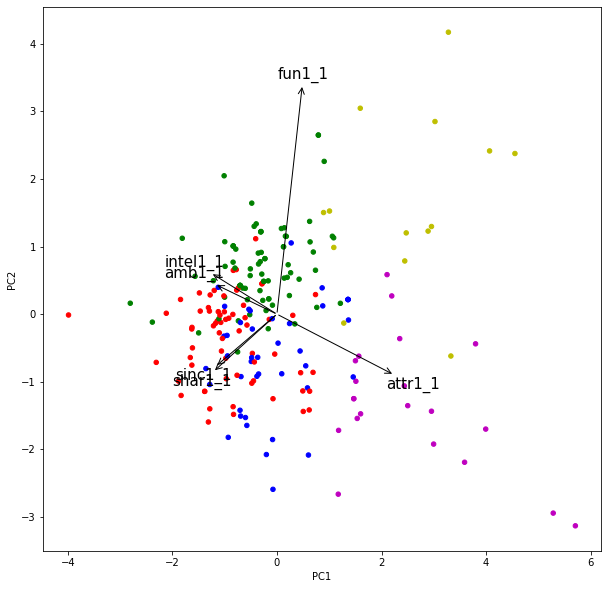

In [24]:

data_subset_tf.plot.scatter(x='PC1', y='PC2', c=data_subset_tf.Cluster.replace([0, 1, 2, 3, 4], ['b', 'r', 'g', 'y', 'm']), figsize=(10,10))
#plt.arrow(0, 0, pca.components_[0,0]*6, pca.components_[0,1]*6, shape='left') 
for i, colname in enumerate(data_subset.columns[:-1]):
    plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4), 
             arrowprops = {'arrowstyle':'<-'})

In [25]:
#no need to scale this data since the value of each feature is 1-10
subsets_pca={}
#GENDER SUBSETS
subsets_pca['all_data_1']=subsets2['all_data_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()
subsets_pca['all_data_man_1']=subsets2['all_data_man_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()
subsets_pca['all_data_woman_1']=subsets2['all_data_woman_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()

#AGE SUBSETS
subsets_pca['all_data_young_1']=subsets2['all_data_young_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()
subsets_pca['all_data_mid_1']=subsets2['all_data_mid_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()
subsets_pca['all_data_old_1']=subsets2['all_data_old_1'].loc[:, ['sports','tvsports','exercise','dining','museums','art', 'hiking','gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies','concerts','music', 'shopping','yoga','Cluster']].copy()

for subsetKey in subsets_pca:
    subsets_pca[subsetKey].dropna(inplace=True)
#another data with less dimensions
subsets_pca_less = {}
subsets_pca_less['all_data_1'] = subsets_pca['all_data_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
subsets_pca_less['all_data_man_1'] = subsets_pca['all_data_man_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
subsets_pca_less['all_data_woman_1'] = subsets_pca['all_data_woman_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
subsets_pca_less['all_data_young_1'] = subsets_pca['all_data_young_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
subsets_pca_less['all_data_mid_1'] = subsets_pca['all_data_mid_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
subsets_pca_less['all_data_old_1'] = subsets_pca['all_data_old_1'].loc[:,['sports','exercise','art', 'clubbing', 'reading', 'tv','music']].copy()
        


    
#subsets_pca['all_data_woman_1']    
#subsets_pca_less

C:\Users\amuza\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



In [134]:
from sklearn.decomposition import PCA
pca = TSNE(n_components=2)
data_subset_pca_2 = pca.fit_transform(subsets_pca_less['all_data_man_1'])
data_subset_pca_2

array([[ 3.0601203e+00, -8.6158867e+00],
       [-2.3606409e-01,  2.6060774e+00],
       [-8.3008976e+00, -2.4873383e+00],
       [ 4.3494523e-01,  8.0128460e+00],
       [ 1.0706973e+00,  7.5540624e+00],
       [ 3.9476528e+00, -4.5072880e+00],
       [ 6.5631866e+00,  6.2896395e+00],
       [-3.9989047e+00, -9.2434578e+00],
       [ 6.0060663e+00,  1.7717627e+00],
       [ 4.5520825e+00,  1.0969784e+00],
       [-9.4227276e+00, -4.5230368e-01],
       [-3.0226889e+00, -7.7387276e+00],
       [-6.1615133e+00, -8.8903818e+00],
       [-1.7815237e+00, -3.0344827e+00],
       [-4.4336400e+00, -3.4006667e-01],
       [ 2.7594318e+00,  6.2267108e+00],
       [ 2.2493825e+00, -3.2262984e-01],
       [ 2.2097373e+00, -9.6676121e+00],
       [-1.1188053e+01,  7.3147104e-03],
       [ 2.2779336e+00,  5.6385058e-01],
       [-2.1308434e+00,  1.0134586e+01],
       [-2.1138771e+00, -6.8375106e+00],
       [-1.9253869e-01, -9.1453934e+00],
       [-5.0308447e+00, -3.3479350e+00],
       [ 1.89046

In [136]:
data_subset_pca_2_labels = subsets_pca['all_data_man_1']['Cluster'].values 
data_subset_tf2 = pd.DataFrame(data_subset_pca_2, columns=['PC1', 'PC2'])
data_subset_tf2 = pd.concat([pd.DataFrame(data_subset_pca_2, columns=['PC1', 'PC2']),
                            pd.DataFrame(data_subset_pca_2_labels, columns=['Cluster'])],
                           axis=1)
data_subset_tf2
#data_subset_pca_labels
#subsets_pca['all_data_woman_1']['Cluster']


,PC1,PC2,Cluster
0,3.060120,-8.615887,0
1,-0.236064,2.606077,3
2,-8.300898,-2.487338,2
3,0.434945,8.012846,3
4,1.070697,7.554062,1
5,3.947653,-4.507288,4
6,6.563187,6.289639,0
7,-3.998905,-9.243458,1
8,6.006066,1.771763,4
9,4.552083,1.096978,4


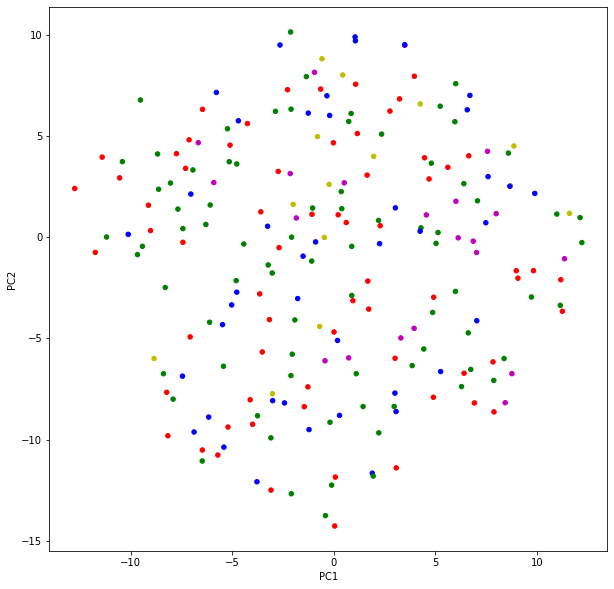

In [137]:
data_subset_tf2.plot.scatter(x='PC1', y='PC2', c=data_subset_tf2.Cluster.replace([0, 1, 2, 3, 4], ['b', 'r', 'g', 'y', 'm']), figsize=(10,10))
#plt.arrow(0, 0, pca.components_[0,0]*6, pca.components_[0,1]*6, shape='left')
#for i, colname in enumerate(subsets_pca_less['all_data_man_1'].columns):
    #plt.annotate(colname, ha='center', va='bottom', xy=(0, 0), size=15,
             #xytext=(pca.components_[0,i]*4, pca.components_[1,i]*4), 
             #arrowprops = {'arrowstyle':'<-'})

In [133]:
df = data_subset_tf2
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
              color='Cluster', size='Cluster')
fig.show()

# Ok, but how many clusters?

There are multiple methods, out of which the most popular are:
- Elbow method 
- Silhouette (try at home)

In [ ]:
#Elbow method taken from: https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb

def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [ ]:
plt.plot(np.linspace(1, 10, 10), calculate_WSS(data_subset_scaled, 10))
plt.xlabel('Number of clusters')
plt.ylabel('WSS')